Скатерть Улама и тонкая структура простоты чисел

Скатерть Улама ( https://ru.wikipedia.org/wiki/Скатерть_Улама  https://en.wikipedia.org/wiki/Ulam_spiral ) это очень красивое и 
наглядное представление структуры простых чисел. Красивая картинка говорит о том, что расположение простых чисел на оси натуральных чисел не случайно. 
Но вот формулу простую, по которой можно быстро и просто получить следующее простое число еще не придумали.


В данной статье мы тоже исследуем свойства "скатерти Улама", только немного её уплотним.
Наша цель исследовать структуру множества простых чисел, их плотность и равномерность расположения на оси натуральных чисел.
У нас уже есть есть файл с первыми 203280222 штук простых чисел, это столько помещается в 64 бита и с такими работать можно быстро.


In [38]:
#!pip install nbconvert

In [2]:
""" читаем библиотеки для вычислений и загрузки"""
import numpy as np
import math
import struct
import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import NoNorm


тут считываем начало пред вычисленного файла простых чисел. Можно его раздобыть на просторах интернета, можно сделать самому. НО так
удобней и проще, не нужно тратить время и ждать вычислений, но есть опасность, что в него может закрасться ошибка

In [3]:
n_primes = 20000000 #203280222
u_primes = np.zeros(n_primes, dtype='int64')

u_primes[0] = 1
with open(r'c:\data\203280221.bin', 'rb') as f:
    for i in range(1, n_primes):
        s = f.read(8)
        if s == '':
            break
        u_primes[i] = struct.unpack('Q',s)[0]

Создаем матрицы для скатерти и для краткой версии, которую назовем 'косынка' 
Скатерть будем делать 1024 на 1024


In [4]:
DIM = 1024
DIM2 = DIM//2
kerchief = np.zeros((DIM, DIM, 3), dtype=np.uint8)
ulam = np.ones((DIM, DIM, 3), dtype=np.uint8)
px = 1/plt.rcParams['figure.dpi']  # pixel in inches


Маленькая подпрограмма для размещения точек в матрице, т. к. координаты могут быть отрицательными и начало координат, 
точка (0,0) находится в точке (DIM2, DIM2) матриц, то так лучше. Можно конечно сделать класс, метод, но это лишнее в данном случае. 

In [5]:
""" размещение точки на скатерти или на чем придется""" 
def place_point(x, y, img, color):
    _x = x + DIM2
    _y = y + DIM2
    if (_x >= DIM or _y >= DIM):
        # print('max ',_x, _y)
        return (-1)
    img[_x, _y] = color
    return (1)
    

рисуем саму скатерть Улама. Ведем по кривой начиная с точки [0,0] кусочками от одного простого числа до другого
и там, где надо ставим 0, остальные точки изначально "белые". Получатся черные точки на белом фоне. Программа рисует до того, как дойдет до границ матрицы.
Такая картинка есть везде в интернетах. Красиво

In [6]:

dir_x = [1,0,-1,0]
dir_y = [0,1,0,-1]
cnt = 1
stp = 0
coor_x = 0
coor_y = 0
d_dir = 0
i_cnt = 0
i_t = 0
for jj in range(2500000):
    st = u_primes[jj]
    en = u_primes[jj+1]
    if (place_point(coor_x, coor_y, ulam, [0,0,0]) < 0):
        break
    for ii in range(en-st):
        i_t += 1
        if (i_cnt == cnt):
            stp = (stp+1)%4
            cnt += d_dir
            d_dir = (d_dir+1)%2
            i_cnt = 0

        coor_x += dir_x[stp]
        coor_y += dir_y[stp]
        i_cnt += 1



теперь нарисуем то, что получилось
Явно видны наклонные линии.
Но есть вариант немного другой.

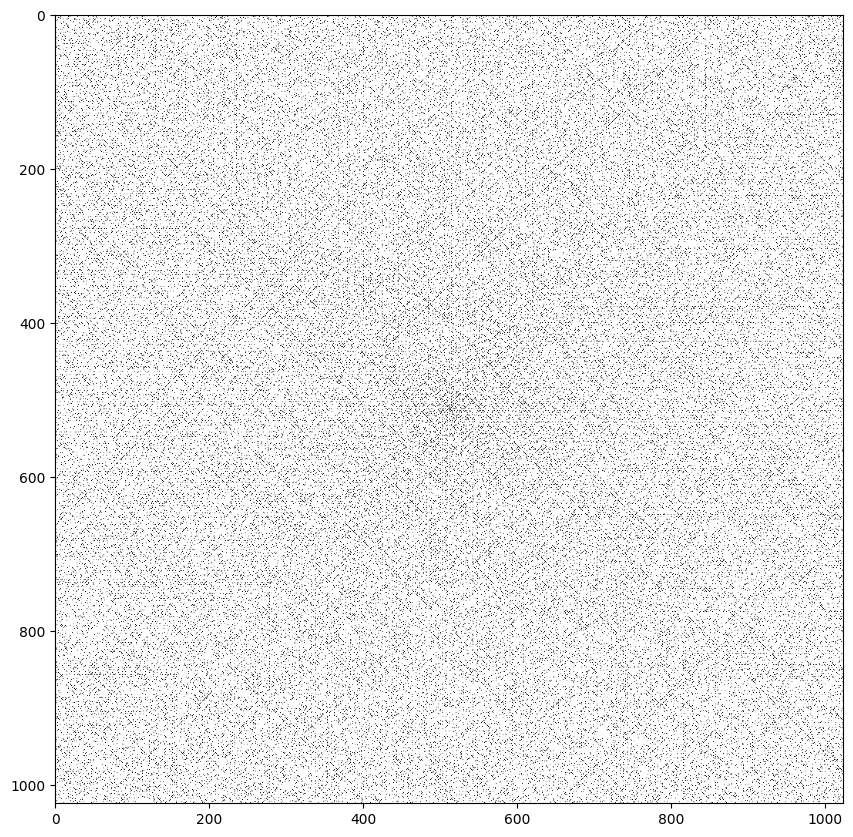

In [7]:

fig = plt.figure(figsize=(DIM*px, DIM*px))
ax = fig.add_subplot()

ax.imshow(ulam*255, norm=NoNorm(), resample=False)

Т. к. все простые числа суть нечетные, то можно обходить спираль только по ним и
тогда на той же матрице поместится вдвое больше простых чисел.
И картинка нисколько не потеряет в наглядности
и также будут видны все те же зависимости
и, наверно, многие другие.
Назовем такую матрицу косынкой, что бы не путать со скатертью

In [8]:
dir_x = [1,0,-1,0]
dir_y = [0,1,0,-1]
cnt = 1
stp = 0
coor_x = 0
coor_y = 0
d_dir = 0
i_cnt = 0
i_t = 0
for jj in range(2500000):
    st = u_primes[jj]
    en = u_primes[jj+1]
    if (place_point(coor_x, coor_y, kerchief, [1,0,0]) < 0):
        break
    for ii in range((en-st)//2):
        i_t += 1
        if (i_cnt == cnt):
            stp = (stp+1)%4
            cnt += d_dir
            d_dir = (d_dir+1)%2
            i_cnt = 0

        coor_x += dir_x[stp]
        coor_y += dir_y[stp]
        i_cnt += 1



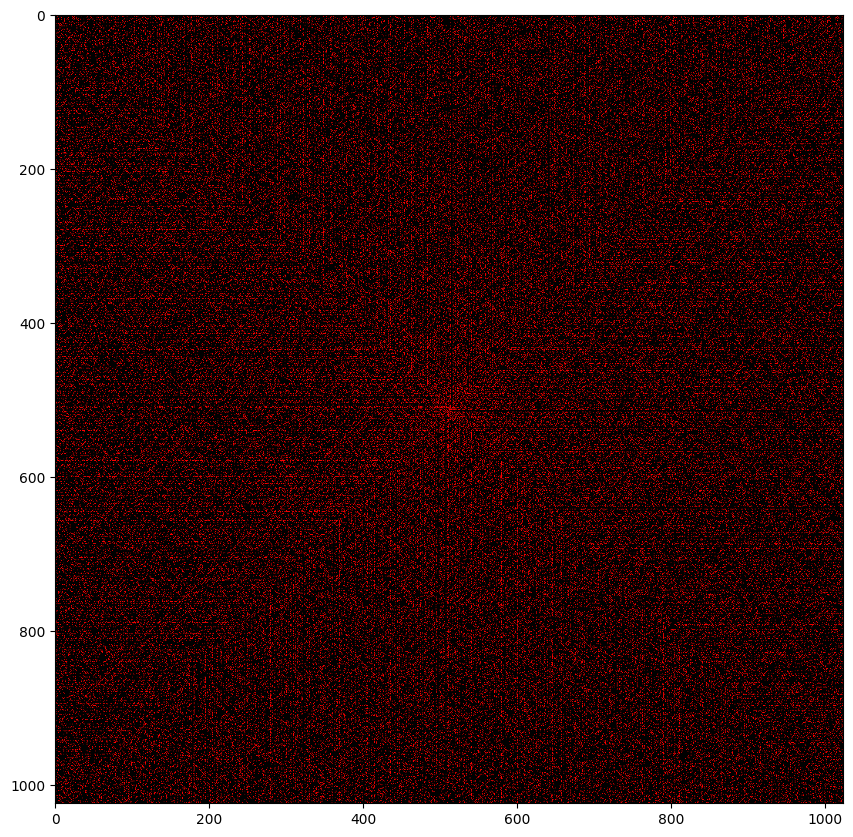

In [9]:

fig = plt.figure(figsize=(DIM*px, DIM*px))
ax = fig.add_subplot()

ax.imshow(kerchief*255, norm=NoNorm(), resample=False)

структура стала иной, но осталась наглядной и стройной.
Попробуем изучить, то что получили.
Например сколько простых помещается в квадраты с центром в точке начала.
Получается очень интересная кривая. И это не часть графика квадратного уравнения
Из теории помним, что в квадрате со стороной 2*i простых должно быть 1/ln(4*i*i)


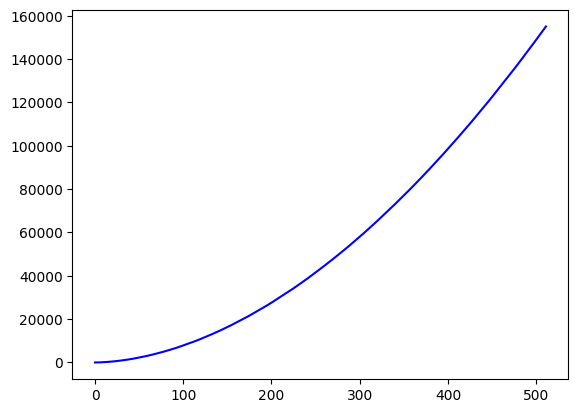

In [10]:
dens_img = np.zeros((DIM2, DIM2, 3), dtype=np.uint8)
t = np.arange(0, DIM2, 1)
dens = np.array([kerchief[DIM2-i:DIM2+i,DIM2-i:DIM2+i].sum() for i in t])

plt.plot(t, dens, 'b')
plt.show()


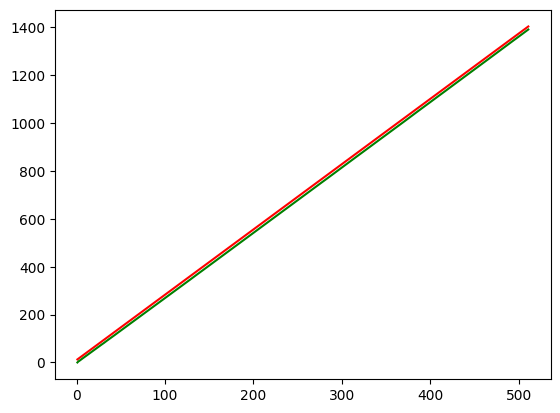

In [11]:
t = np.arange(1, DIM2, 1)

dens_r = np.array([10+(4.61*i*dens.max())/(DIM2**2) for i in t])
dens_g = np.array([(kerchief[DIM2-i:DIM2+i,DIM2-i:DIM2+i].sum()*np.log(i*i))**0.5 for i in t])

plt.plot(t, dens_r, 'r')
plt.plot(t, dens_g, 'g')
plt.show()


казалось бы всё по теории, но разница тоже не случайна между реальным и предсказанным количеством простых
Она, очевидно, имеет тренд.
Но это для будущих исследований


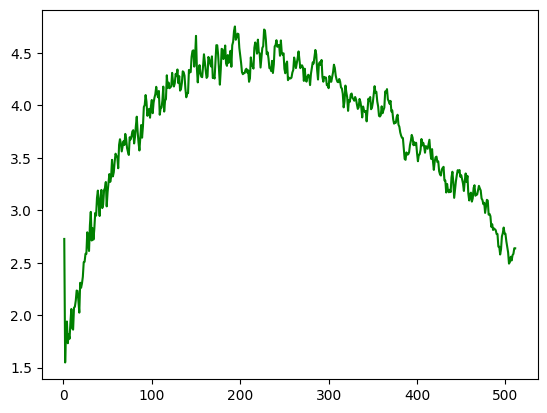

In [12]:
plt.plot(t, dens_r-dens_g-10, 'g')
plt.show()

очень интересно исследование плотности простых чисел на косынке
Если взять произвольные выборки одной длины и взять среднее, то видим, что особой какой-то
неслучайности там нет.
Вот график среднего по выборкам 1024 = 32х32


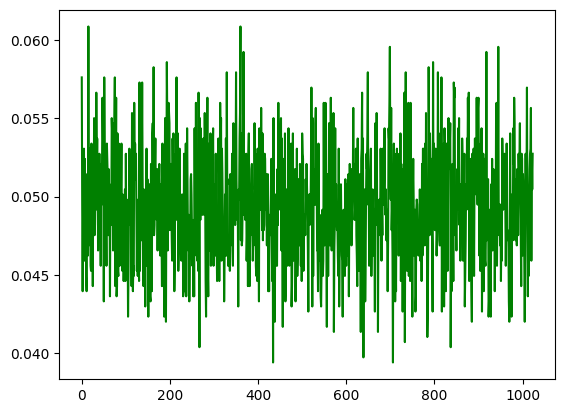

In [13]:
DIM_W = 32*32  # окно
DIM_S = 1024   # выборок шт

t_q = np.arange(DIM_S)
Q3 = np.zeros(DIM_S, dtype='float')

for b in range(DIM_S):
    t_i = np.random.randint(0,DIM, DIM_W)
    t_j = np.random.randint(0,DIM, DIM_W)

    Q3[b] = np.mean(kerchief[t_i,t_j])

plt.plot(t_q, Q3, 'g')
plt.show()

построим график плотности точек.
Т.е. будем брать произвольные точки и делить количество попавших простых на общее количество.
И построим график зависимости

Как видно нет особых отклонений в плотности. Т.е. количество простых чисел в достаточно большой выборке зависит только от её размера и пропорционально по всей скатерти.


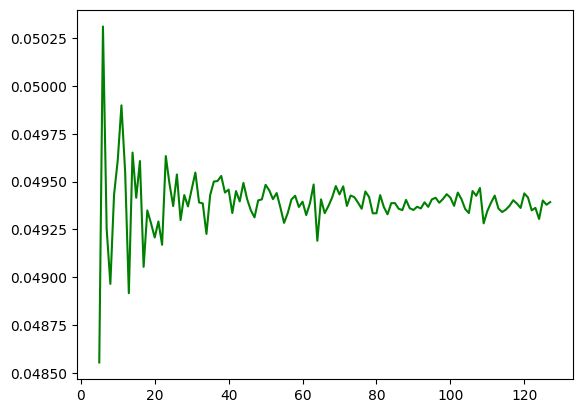

In [14]:

DIM_Q = 128 # среднее по
DIM_S = 1024 # выборок шт

t_q = np.arange(2,DIM_S)
Q3 = np.zeros(DIM_S, dtype='float')

t_qq = np.arange(DIM_Q)
Q2 = np.zeros(DIM_Q, dtype='float')

for a in range(2, DIM_Q):
    DIM_W = a**2
    for b in range(DIM_S):
        t_i = np.random.randint(0,DIM, DIM_W)
        t_j = np.random.randint(0,DIM, DIM_W)
    
        Q3[b] = np.mean(kerchief[t_i,t_j])
    Q2[a] = np.mean(Q3)

plt.plot(t_qq[5:], Q2[5:], 'g')
plt.show()

А вот этот эксперимент поставил в тупик. Или в коде ошибка, но проверял много раз, или что-то не равномерно расположены точки на скатерти
Просканируем скатерть окном 64х64 и возьмем среднее в этом окне.
График зависимости количества точек в окне от месторасположения окна показан ниже. И очевидно, что правая часть графика, 
а это нижняя правая четверть скатерти, отличается от остального графика. Но глазами на скатерти не видно уплотнения точек в правом нижнем углу


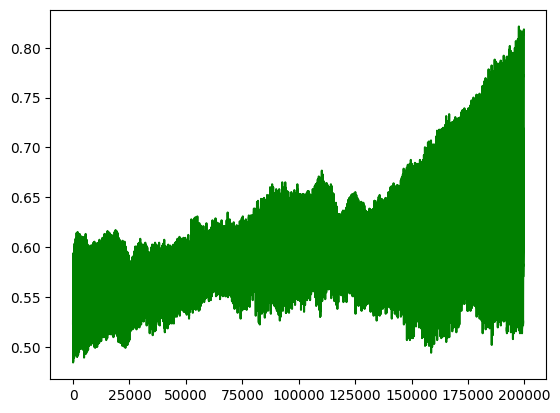

In [15]:

DIM_Q = 64
DIM_Q2 = DIM_Q//2
t_q = np.arange((DIM2-DIM_Q)**2)
Q2 = np.zeros((DIM2-DIM_Q)**2, dtype='float')
i_q = 0
for i in range(DIM_Q2, DIM2-DIM_Q2-1, 1):
    for j in range(DIM_Q2, DIM2-DIM_Q2-1, 1):
        Q2[i_q] = kerchief[i-DIM_Q2:i+DIM_Q2,j-DIM_Q2:j+DIM_Q2].sum()/(DIM_Q2**2)
        i_q += 1

plt.plot(t_q[:i_q], Q2[:i_q], 'g')
plt.show()


более детальные графики количества точек в квадрате 64х64. Явная симметрия, структура повторяющаяся.
В меньшей части первого индекса картинка совсем не совпадает с таким же графиком большей части первого индекса
 Т. е. каждая точка этого графика это количество простых в квадрате 64х64
как бы понятно, что составные числа как бы периодичны, каждое второе, каждое третье и т. д.


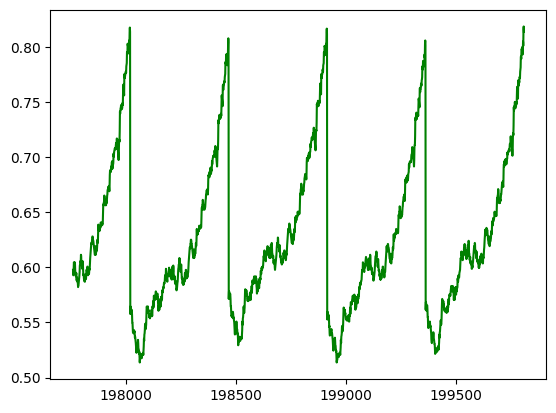

In [16]:

plt.plot(t_q[i_q-DIM*2:i_q], Q2[i_q-DIM*2:i_q], 'g')
plt.show()

Это график количества простых чисел в квадрате 64х64 на косынке, но в меньшей части первого индекса 

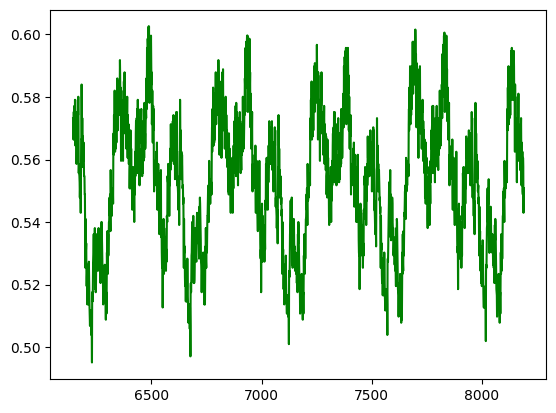

In [17]:
plt.plot(t_q[DIM*6:DIM*6+DIM*2], Q2[DIM*6:DIM*6+DIM*2], 'g')
plt.show()

обычный гауссиан не показывает какого либо изменения плотности. Глазами не видно

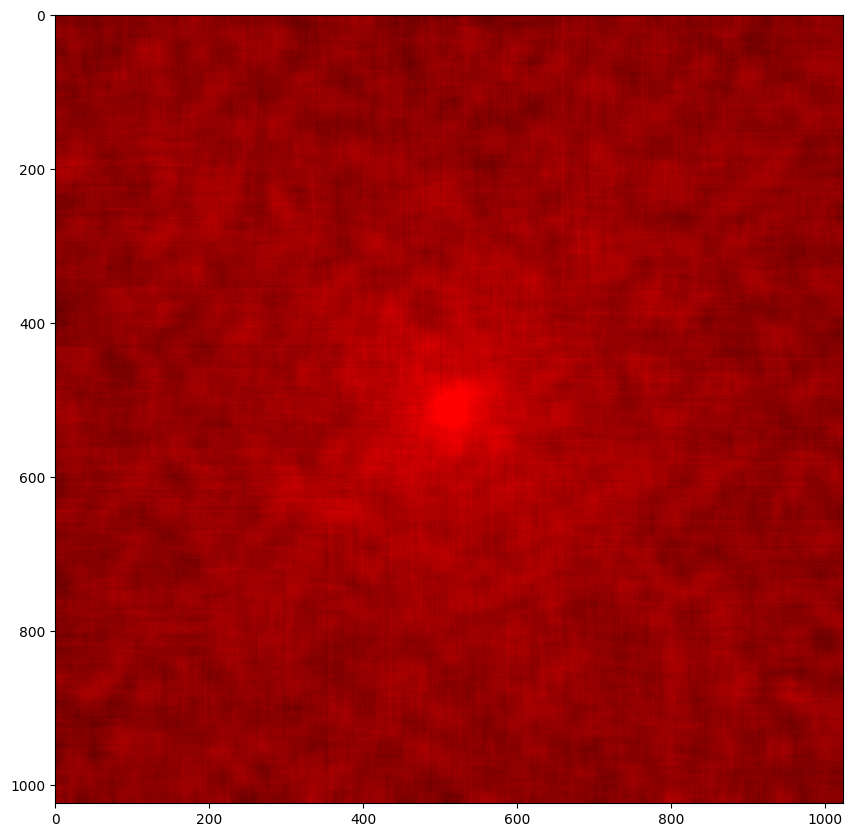

In [18]:
kernel = np.ones((32,32), np.float32)
dst = cv2.filter2D(kerchief, -1, kernel)

fig = plt.figure(figsize=(1024*px, 1024*px))
ax = fig.add_subplot()
ax.imshow(dst, resample=False)

Другой фильтр. Подчеркивает горизонтальные и вертикальные линии через точки косынки

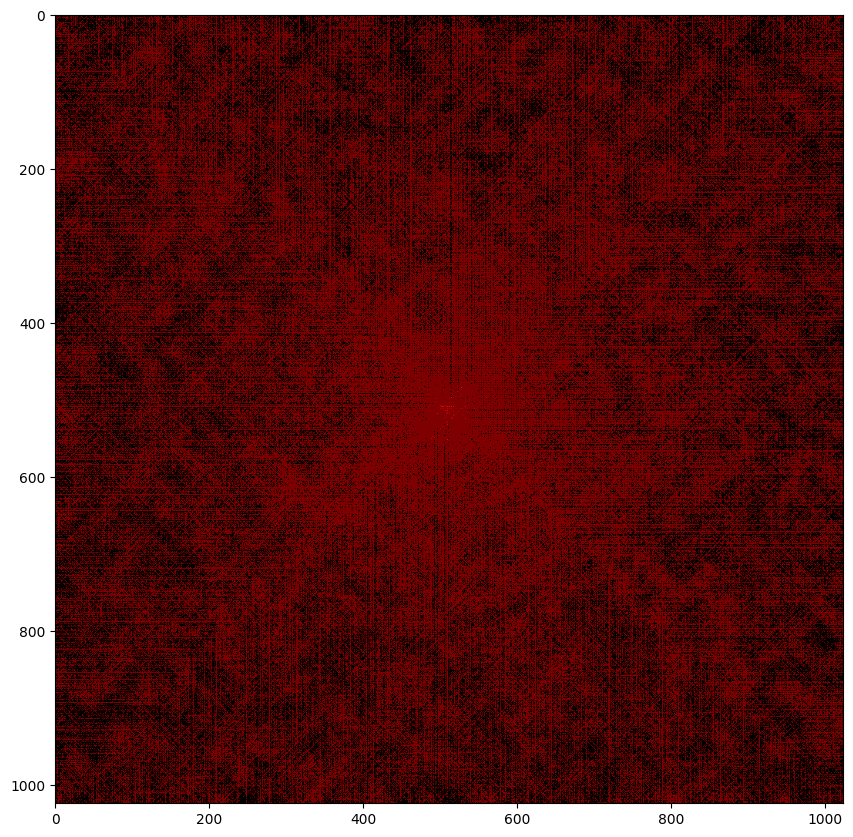

In [19]:
kernel = np.zeros((33,33), np.float32)
kernel[17,:] = 1
kernel[:,17] = 1
for i in range(33):
    kernel[i,i] = 1
    kernel[i,33-i-1] = 1

kernel = kernel/(17+17)
dst = cv2.filter2D(kerchief, -1, kernel)

fig = plt.figure(figsize=(1024*px, 1024*px))
ax = fig.add_subplot()

ax.imshow(dst*127, norm=NoNorm(), resample=False)

# cv2.imshow('filter', dst*3)
# print(dst.min(), dst.max())

Вот такая очевидная симметрия на косынке по линиям, как пример несколько образцов.
Диагонали не очень интересны, а вот ответвления от диагоналей весьма не случайны.
Там явная структура

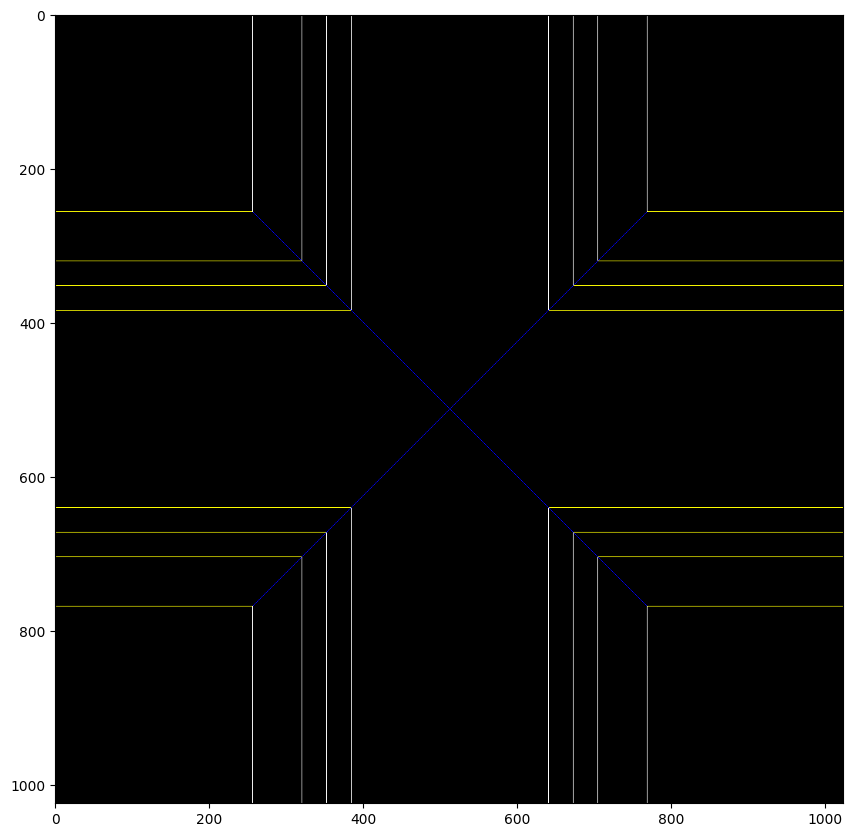

In [20]:
red_ltv_test = np.zeros((DIM, DIM, 3), dtype=np.uint8)
red_lth_test = np.zeros((DIM, DIM, 3), dtype=np.uint8)

#i_num = 256
for i_num in [128, 128+32, 128+64, 128+128]:
    for d_x in [1,-1]:
        for d_y in [1,-1]:
            for i in range(i_num):
                if (place_point(i * d_x, i * d_y, red_ltv_test, [0, 0, 1]) < 0):
                    break
                place_point(i * d_x, i * d_y, red_ltv_test, [0, 0, 1])
            
            for i in range(i_num, DIM2):
                if (place_point(i_num * d_x, i * d_y, red_ltv_test, [abs(d_x), abs(d_y), 0]) < 0):
                    break
                place_point(i * d_x, i_num * d_y, red_ltv_test, [abs(d_x), abs(d_y), 1])

fig = plt.figure(figsize=(1024*px, 1024*px))
ax = fig.add_subplot()

ax.imshow(red_ltv_test*255, norm=NoNorm(), resample=False)

Тут построим графики структур явно видимых на косынке. Там диагональные лучи из которых вертикальные и горизонтальные линии.
Вот стало интересно, насколько они симметричны. Похожи или дополняют друг друга.
Строим графики по направлениям (+1,+1), (-1,+1), (+1,-1), (-1,-1) от центра
Красные - горизонтальные, зеленые - вертикальные
Очевидна симметрия, первый и четвертый похожи как и второй и третий графики.


In [21]:
def plot_qb(d_x, d_y):
    branch_lv = np.zeros(DIM2, dtype=np.uint32)
    branch_lh = np.zeros(DIM2, dtype=np.uint32)
    tt = np.arange(DIM2)
    
    for i_num in range(DIM2-2):
        # for i in range(i_num):
        #    branch_lv[i_num] += kerchief[i * d_x + DIM2, i * d_y + DIM2, 0]
        branch_lh[i_num] = branch_lv[i_num]   
        for i in range(i_num, DIM2):
            branch_lv[i_num] += kerchief[i_num * d_x + DIM2, i * d_y + DIM2, 0]
            branch_lh[i_num] += kerchief[i * d_x + DIM2, i_num * d_y + DIM2, 0]
        branch_lv[i_num] = branch_lv[i_num]*255/(DIM2-i_num)
        branch_lh[i_num] = branch_lh[i_num]*255/(DIM2-i_num)
    
    fig, axs = plt.subplots(1, 2, figsize=(12,3))
    axs[0].plot(branch_lv,'r')
    axs[1].plot(branch_lh,'g')
    plt.show()
    
    plt.plot(branch_lv, 'r')
    plt.plot(branch_lh, 'g')
    plt.show()


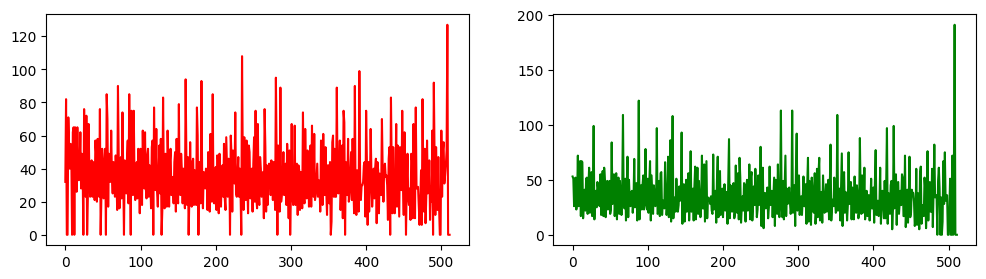

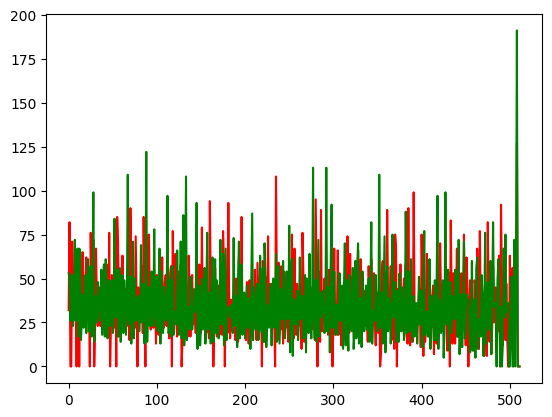

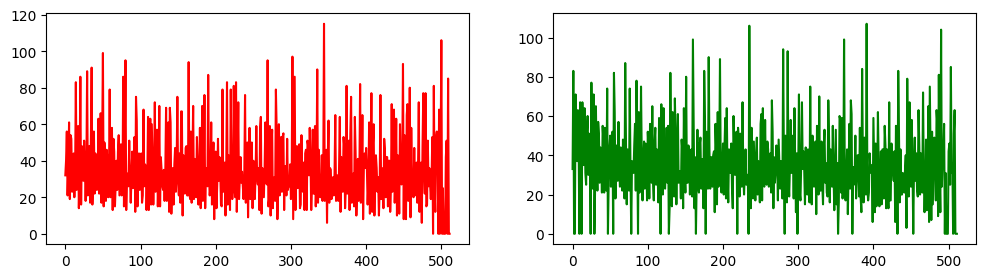

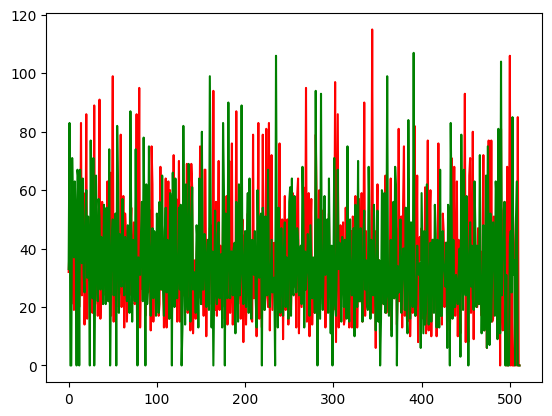

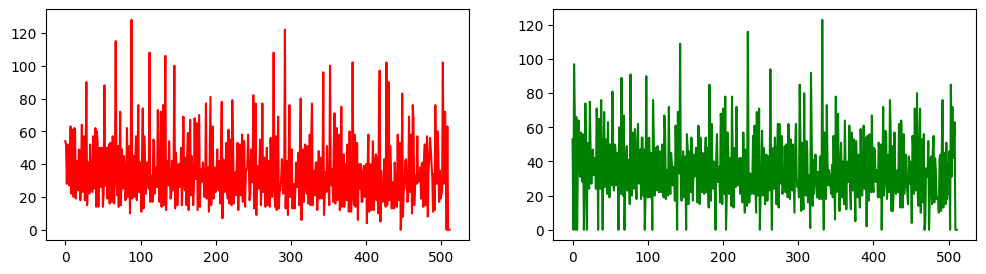

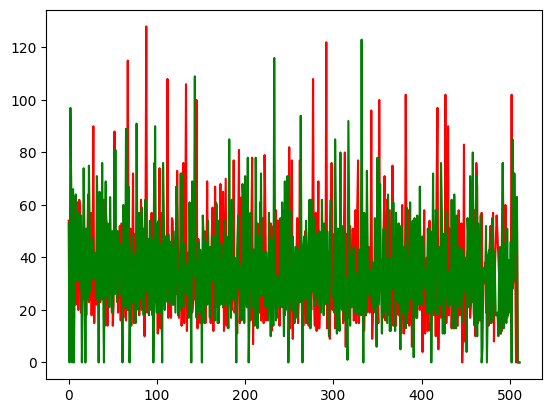

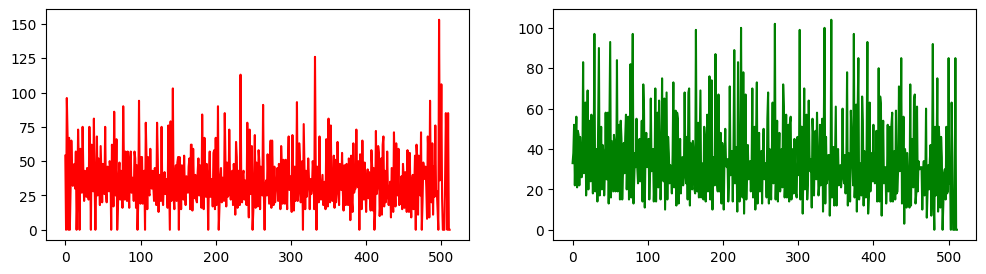

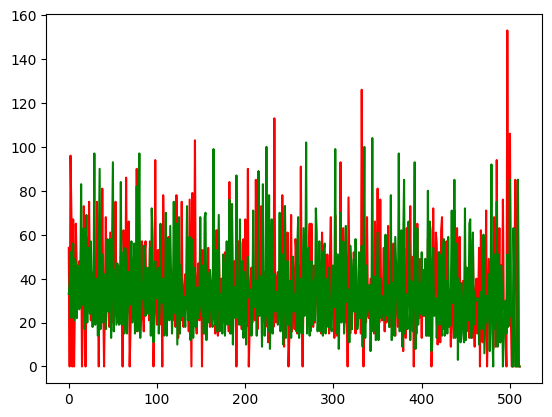

In [22]:
plot_qb(1,1)
plot_qb(-1,1)
plot_qb(1,-1)
plot_qb(-1,-1)

Если рассмотреть по подробней, то очевидна корреляция вертикальной - зеленой и горизонтальной - красной ветки.
Причем в некоторых четвертях совпадают пики и провалы, а в других противоположны, где красный пик, там зеленый провал.
Это неспроста, это нужно исследовать еще, но это потом.
Вот графики другого масштаба

In [23]:
def plot_q(d_x, d_y):
    branch_lv = np.zeros(DIM2, dtype=np.uint32)
    branch_lh = np.zeros(DIM2, dtype=np.uint32)
    tt = np.arange(DIM2)
    
    for i_num in range(DIM2-2):
        for i in range(i_num, DIM2):
            branch_lv[i_num] += kerchief[i_num * d_x + DIM2, i * d_y + DIM2, 0]
            branch_lh[i_num] += kerchief[i * d_x + DIM2, i_num * d_y + DIM2, 0]
        branch_lv[i_num] = branch_lv[i_num]*255/(DIM2-i_num)
        branch_lh[i_num] = branch_lh[i_num]*255/(DIM2-i_num)
    
    fig, axs = plt.subplots(1, 2, figsize=(12,3))
    axs[0].plot(branch_lv[128:128+64],'r')
    axs[1].plot(branch_lh[128:128+64],'g')
    plt.show()
    
    plt.plot(branch_lv[128:128+64], 'r')
    plt.plot(branch_lh[128:128+64], 'g')
    plt.show()


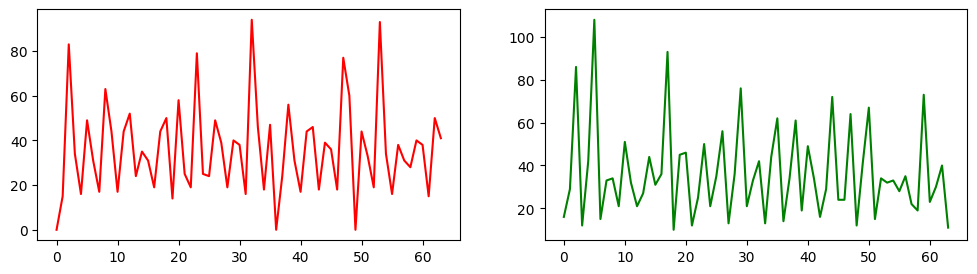

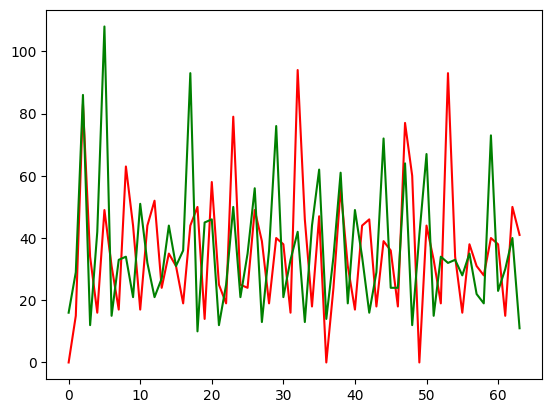

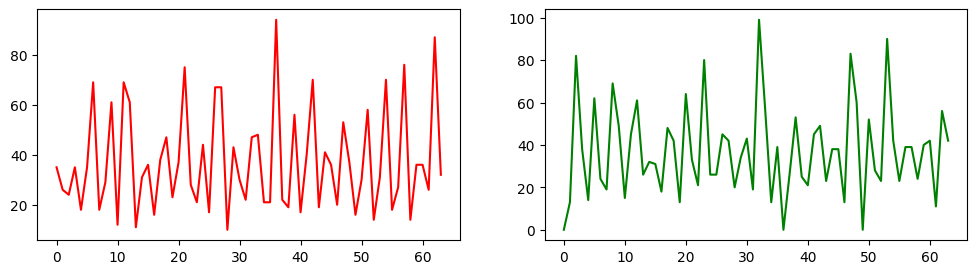

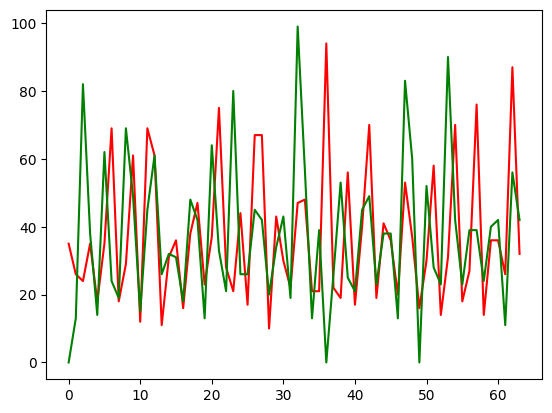

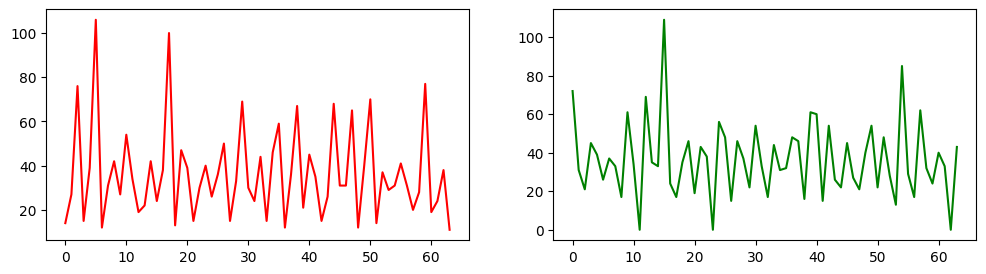

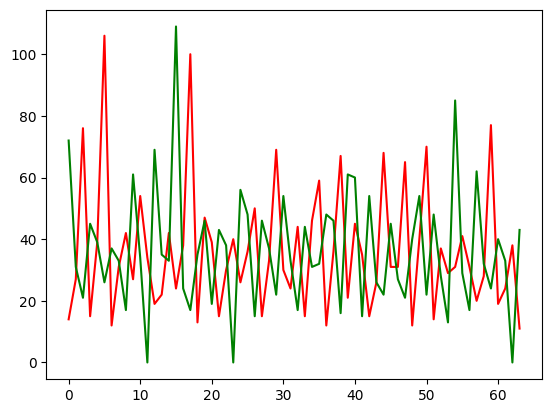

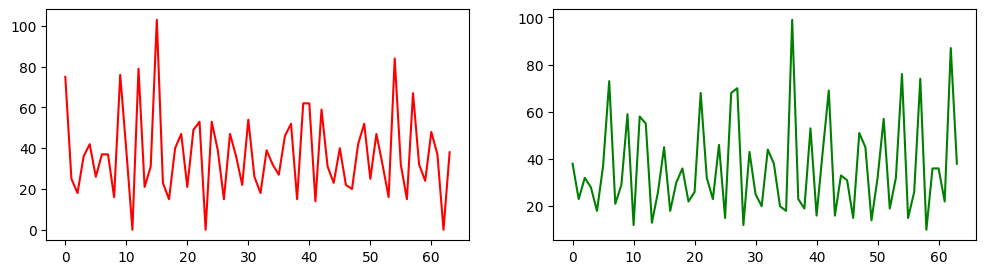

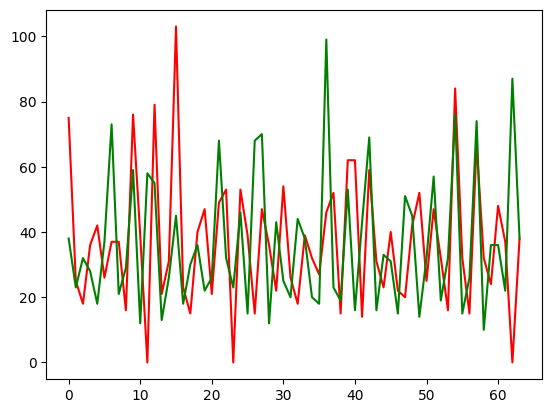

In [24]:

plot_q(1,1)
plot_q(-1,1)
plot_q(1,-1)
plot_q(-1,-1)

Теперь исследуем насколько взаимосвязаны симметричные точки на ветвях от центра. У нас 8 лучей, по два на каждой диагонали.
Попробуем найти плотность точек, т.е. сколько точек на симметрии.
Оказалось, что нет таких точек симметрии, что бы на всех стояли простые числа. Есть 7 простых, но 8 простых, т.е. на всех точках симметрии, не встречаются.
Возможно наверно что 7 само по себе простое, может тут еще какая иная зависимость.

In [25]:
import statistics

tt = np.arange(DIM2)
corr = np.zeros((8,8,DIM2), dtype=np.int32)
kerchief_OR = np.zeros((DIM, DIM, 3), dtype=np.uint8)
kerchief_AND = np.zeros((DIM, DIM, 3), dtype=np.uint8)

for i_num in range(2,DIM2-2):
    l = np.zeros((8,i_num), dtype=np.uint8)
    l[0,:] = kerchief[i_num,0:i_num,0]
    l[1,:] = kerchief[i_num,DIM-i_num:DIM,0]
    l[2,:] = kerchief[DIM-i_num,0:i_num,0]
    l[3,:] = kerchief[DIM-i_num,DIM-i_num:DIM,0]
    l[4,:] = kerchief[0:i_num,i_num,0]
    l[5,:] = kerchief[DIM-i_num:DIM,i_num,0]
    l[6,:] = kerchief[0:i_num,DIM-i_num,0]
    l[7,:] = kerchief[DIM-i_num:DIM,DIM-i_num,0]

    for k in range(8):
        kerchief_OR[i_num,0:i_num,0] += l[k,:]
        kerchief_AND[i_num,0:i_num,0] *= l[k,:]
            
    

In [26]:
kerchief_AND.max(), kerchief_AND.min()

(np.uint8(0), np.uint8(0))

Если исследовать kerchief_OR, то видно, что не встречаются 3,6,8 простых на 8 точках симметрии.
Наверно в дальнейшем буду смотреть зависимости, почему 3 нет, а 4 есть?

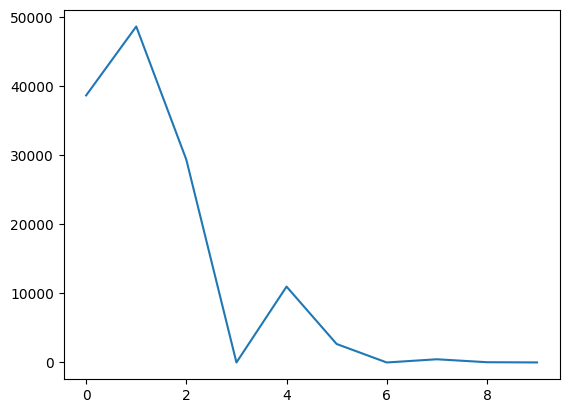

In [27]:
_a = []
for i_num in range(2,DIM2):
    for i in range(i_num):
        _a.append(kerchief_OR[i_num, i, 0])

a = np.array(_a)
counts, bins = np.histogram(a)
plt.plot(counts)


Очень интересный график. Хотел проверить очень уж нестандартную идею - если брать вертикальные 7 точек и представлять их как ASCII символ,
то может получится какой стишок?  ))


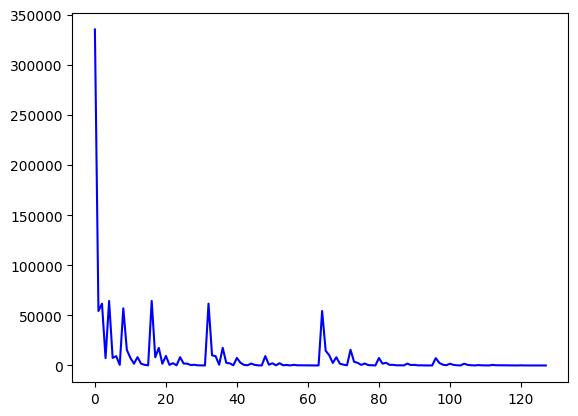

In [32]:

h_7 = np.zeros(128, np.int32)

for i in range(DIM-7):
    for j in range(DIM):
        _char = 0
        for k in range(7):
            _char += kerchief[i+k,j,0]*2**k
        h_7[_char] += 1
plt.plot(h_7, 'b')
plt.show()